              open         high          low        close     adjclose  \
count  3246.000000  3246.000000  3246.000000  3246.000000  3246.000000   
mean     63.936011    65.114214    62.711701    63.911971    63.324109   
std     149.030853   151.416539   146.400184   148.952510   147.114165   
min       1.050000     1.150000     0.820000     1.090000     1.090000   
25%       3.990000     4.040000     3.950000     3.990000     3.872296   
50%      11.205000    11.510000    10.880000    11.200000    11.200000   
75%      39.970001    40.737501    38.980001    39.957500    39.623496   
max     795.739990   799.359985   784.960022   797.489990   783.376221   

             volume  RSIadjclose15  RSIvolume15  RSIadjclose25  RSIvolume25  \
count  3.246000e+03    3051.000000  3051.000000    2921.000000  2921.000000   
mean   4.431222e+05      48.620540    49.816762      48.757164    49.897483   
std    8.772332e+05      12.813405     5.166443       9.595873     3.453365   
min    0.000000e+

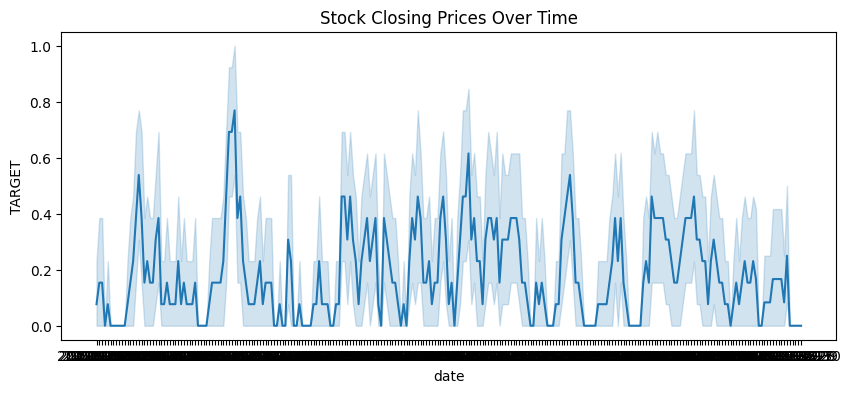

<ipython-input-11-e2418717e4ec>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TARGET'])  # Adjust column name accordingly


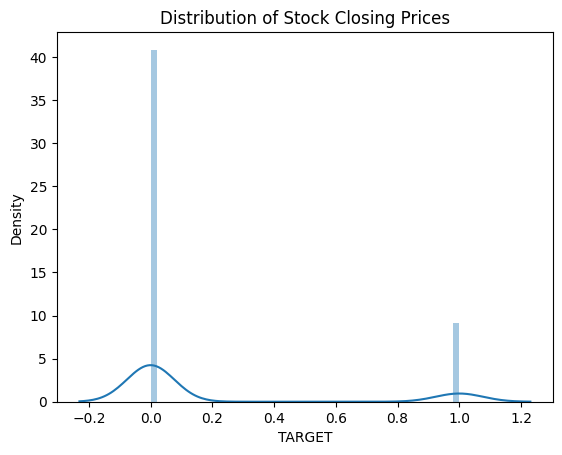

<ipython-input-11-e2418717e4ec>:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['volume'], color='green')


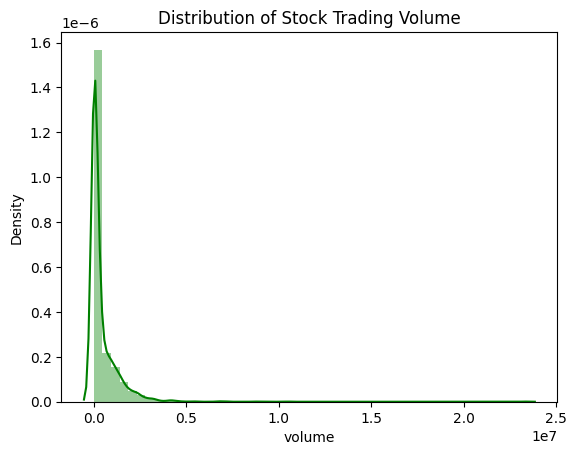

Linear Regression MAE: 0.2848252972403665
Linear Regression MSE: 0.1356389528690568
Linear Regression R2: 0.02817654043350748
Decision Tree MAE: 0.24615384615384617
Decision Tree MSE: 0.24615384615384617
Decision Tree R2: -0.7636385219352539


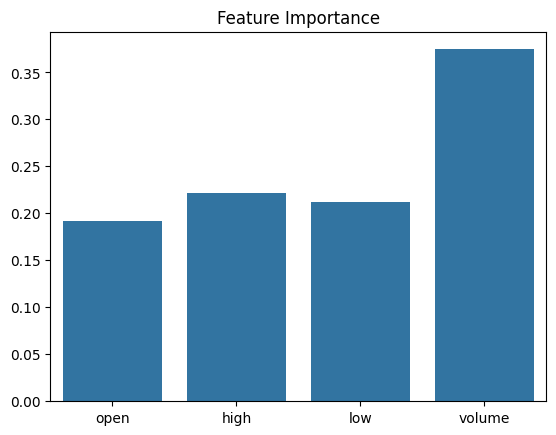

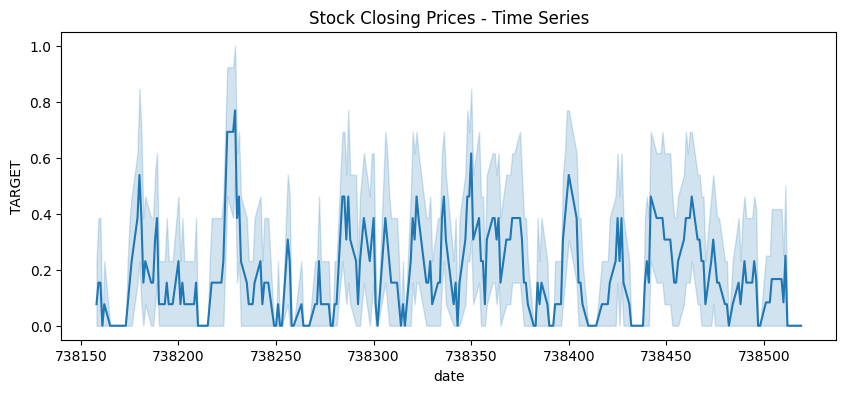

Best hyperparameters: {'max_depth': 3, 'min_samples_split': 2}


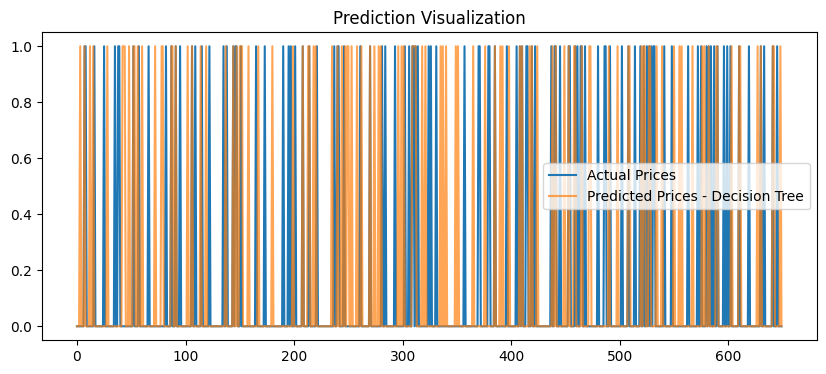

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime  # Add this import

# Load the dataset
data = pd.read_csv('infolimpioavanzadoTarget.csv')

# Drop rows with missing values in the 'TARGET' column
data.dropna(subset=['TARGET'], inplace=True)

# Exploratory Data Analysis (EDA)
# Summary statistics and basic info
print(data.describe())
print(data.info())

# Visualizing key statistics
plt.figure(figsize=(10, 4))
sns.lineplot(data=data, x='date', y='TARGET')
plt.title('Stock Closing Prices Over Time')
plt.show()

# Analyzing distribution of stock prices and volume
sns.distplot(data['TARGET'])
plt.title('Distribution of Stock Closing Prices')
plt.show()

sns.distplot(data['volume'], color='green')
plt.title('Distribution of Stock Trading Volume')
plt.show()

# Now, proceeding to predictive modeling
# Convert 'date' to numeric for modeling if needed
# This might depend on your dataset's structure and is a simplification
data['date'] = pd.to_datetime(data['date']).map(datetime.toordinal)

# Prepare features (X) and target (y)
feature_columns = ['open', 'high', 'low', 'volume']
X = data[feature_columns]
y = data['TARGET']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predictive Modeling
# Implement Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Drop rows with missing values in y_test and linear_predictions
y_test = y_test.dropna()
linear_predictions = pd.Series(linear_predictions, index=y_test.index).dropna()

# Evaluate models
# Linear Regression Metrics
linear_mae = mean_absolute_error(y_test.values, linear_predictions)
linear_mse = mean_squared_error(y_test.values, linear_predictions)
linear_r2 = r2_score(y_test.values, linear_predictions)

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Evaluate Decision Tree model
tree_mae = mean_absolute_error(y_test.values, tree_predictions)
tree_mse = mean_squared_error(y_test.values, tree_predictions)
tree_r2 = r2_score(y_test.values, tree_predictions)

print(f"Linear Regression MAE: {linear_mae}")
print(f"Linear Regression MSE: {linear_mse}")
print(f"Linear Regression R2: {linear_r2}")

print(f"Decision Tree MAE: {tree_mae}")
print(f"Decision Tree MSE: {tree_mse}")
print(f"Decision Tree R2: {tree_r2}")

# Feature Importance Analysis
# Assuming a decision tree model
feature_importance = tree_model.feature_importances_
sns.barplot(x=feature_columns, y=feature_importance)
plt.title('Feature Importance')
plt.show()

# Time Series Visualization
# Assuming 'date' has been preprocessed if necessary
plt.figure(figsize=(10, 4))
sns.lineplot(data=data, x='date', y='TARGET')  # Adjust column names accordingly
plt.title('Stock Closing Prices - Time Series')
plt.show()

# Hyperparameter Tuning for Decision Tree
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_tree_model = grid_search.best_estimator_

# Print best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Visualizing predictions vs. actual prices
plt.figure(figsize=(10, 4))
plt.plot(y_test.reset_index(drop=True), label='Actual Prices')
plt.plot(tree_predictions, label='Predicted Prices - Decision Tree', alpha=0.7)
plt.legend()
plt.title('Prediction Visualization')
plt.show()

# This project template serves as a starting point. Each of these sections
# should be expanded with further analysis and refined with additional
# preprocessing, feature engineering, and sophisticated modeling techniques.
